In [16]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt


In [2]:
dataset_merge_file = "../data/output/dataset_merge.tsv"
references_dir = "../data/output/references"

# Output
fig_dir = "../data/output"

In [3]:
tuples = []
for reference_file in os.listdir(references_dir):
    with open("{}/{}".format(references_dir, reference_file)) as f:
        data = {}
        reference_name = reference_file.split(".")[0]
        group = None
        for k in ['linker', 'binding', 'disorder']:  # order matters
            if k in reference_name:
                group = k
                break
        for line in f:
            if line:
                if line[0] == ">":
                    name = line.strip()[1:]
                    data.setdefault(name, [])
                else:
                    data[name].append(list(line.strip()))
        for name in data:
            for i, (aa, val) in enumerate(zip(*data[name])):
                tuples.append((group, reference_name, name, i + 1, aa, val))
df = pd.DataFrame(tuples, columns=['group', 'reference', 'disprot_id', 'pos', 'aa', 'value'])
df.set_index(['group', 'reference', 'disprot_id', 'pos', 'aa'], inplace=True)
df

value
group   reference            disprot_id pos aa      
binding nucleic_acid_binding DP02348    1   M      0
                                        2   A      0
                                        3   P      0
                                        4   V      0
                                        5   S      0
...                                              ...
        binding_disorder     DP03880    787 E      -
                                        788 L      -
                                        789 K      -
                                        790 C      -
                                        791 G      -

[1580241 rows x 1 columns]

value                       -        0       1
reference                                     
binding                   0.0  69478.0  8376.0
binding_disorder      65502.0   3976.0  8376.0
nucleic_acid_binding      0.0   8400.0   502.0
value                     -         0         1
reference                                      
disorder                0.0  334785.0   41609.0
disorder_nox            0.0  159234.0   31823.0
disorder_pdb       191881.0  142904.0   41609.0
disorder_pdb_fill       0.0  143088.0  234922.0
value                  -        0       1
reference                                
linker               0.0  44241.0  2647.0
linker_disorder  42004.0   2237.0  2647.0


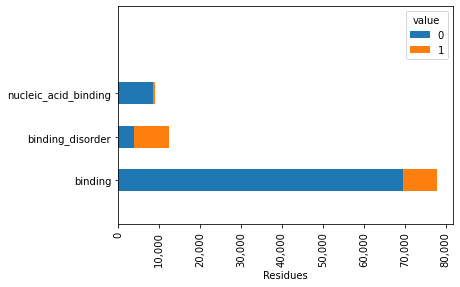

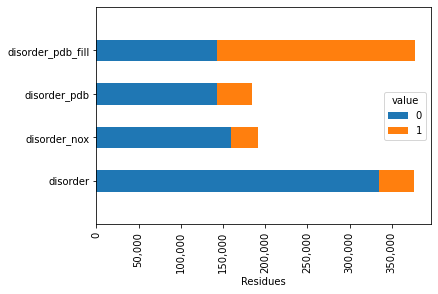

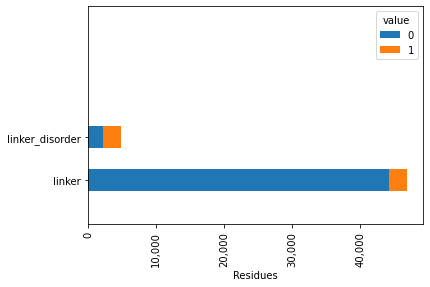

In [20]:
for group, df_g in df.groupby(level='group'):
    df2 = df_g.groupby(['reference'])['value'].value_counts().unstack('value').fillna(0).sort_values(by=['reference'], ascending=[True])
    print(df2)
    ax = df2.drop(columns=['-']).plot(kind='barh', stacked=True)
    ax.set_ybound(-1, 4)
#     ax.get_legend().remove()
    ax.set_xlabel('Residues')
    ax.xaxis.set_major_formatter( matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.tick_params(axis='x', labelrotation=90)
    fig = ax.get_figure()
    fig.gca().set_ylabel("")
    fig.savefig("{}/stat_residues_{}.png".format(fig_dir, group), dpi=300, bbox_inches='tight')

                      disprot_id
reference                       
binding                       89
binding_disorder              89
nucleic_acid_binding           9
                   disprot_id
reference                    
disorder                  485
disorder_nox              254
disorder_pdb              485
disorder_pdb_fill         486
                 disprot_id
reference                  
linker                   49
linker_disorder          49


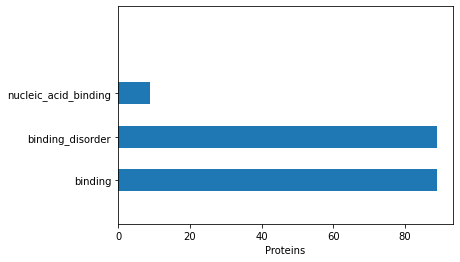

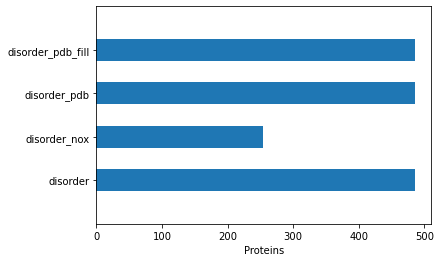

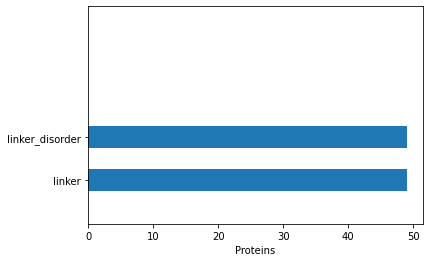

In [11]:
for group, df_g in df.groupby(level='group'):
    df2 = df_g.reset_index(level='disprot_id').groupby(['reference'])['disprot_id'].nunique().reset_index().set_index('reference')
    print(df2)
    ax = df2.plot(kind='barh', width=0.5)
    ax.set_ybound(-1, 4)
    ax.get_legend().remove()
    ax.set_xlabel('Proteins')
    fig = ax.get_figure()
    fig.gca().set_ylabel("")
    fig.savefig("{}/stat_proteins_{}.png".format(fig_dir, group), dpi=300, bbox_inches='tight')